# Servicer Portfolio Repayment Plan
## Data Source: National Student Loan Data System (NSLDS)
This tab provides definitions for Servicer Portfolio by Repayment Plan.													
													
Data Source: National Student Loan Data System													
Data Run Date: Data is run at the end of each quarter listed by federal fiscal year. Each federal fiscal year begins October 1 and ends September 30. Q1 ends 12/31, Q2 ends 3/31, Q3 ends 6/30, and Q4 ends 9/30.													
													
Notes: 													
Repayment Plan summary includes Direct Loan and ED-owned Federal Family Education Loan borrowers in Repayment, Deferment and Forbearance categories and excludes borrowers in Default, In-School, and Grace. This summary also excludes open disability loans that are not currently assigned to a servicer. 													
Recipient counts are based at the loan level. As a result, recipients may be counted multiple times across varying loan statuses.									



# Defination
* Field Name                :Defination 


* Level: 10 years or less    :A repayment plan with fixed payments over a period of 10 years or less.



* Level: > 10 years          : A repayment plan with fixed payments over a period greater than 10 years.




* Graduated: 10 years or less :A repayment plan with graduated payments over a period of 10 years or less. 




* Graduated: > 10 years      :A repayment plan with graduated payments over a period greater than 10 years.



* Income-Contingent         : A repayment plan that calculates the monthly payment amount each year based on a                                      borrower's adjusted gross income, family size, and the total amount of Direct Loans Any remaining 

 

* Income-Based             :A repayment plan that caps borrowers' monthly payments at 15 percent of their                                         discretionary income. Any remaining loan balance is forgiven after 25 years of qualifying                            payments.

  

* Pay As You Earn        :A repayment plan that caps borrowers' monthly payments at 10 percent of their                                        discretionary income. 

   

* Alternative               : Any remaining loan balance is forgiven after 20 years of qualifying                                                   payments. 


* :A repayment plan customized to the borrower's circumstances that meet basic repayment plan                             requirements.

* Other                     :Includes loans at the time of the data query not currently listed on a repayment plan.

* Dollars Outstanding        :Includes the outstanding principal and interest balance of loans in the specified status.

* Recipients                 :Includes the number of recipients in the specified loan status. The recipient is the                                student that benefits from the federal student loan. In most cases, the recipient is the                               borrower, but in


* Not Available (NA): We are unable to calculate the number of recipients in Repayment, Deferment, and Forbearance without recorded repayment plans for this quarter due to a change in reporting.  We expect to resume reporting this data element in the future. 																						

In [100]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import numpy as np
from altair import Chart,X,Y,Axis,SortField

In [2]:
# datafiles
file_dec_2016= '/Users/macos/Desktop/student crisis/repayment_plan_data/dec_2016.xls'
file_dec_2018= '/Users/macos/Desktop/student crisis/repayment_plan_data/dec_2018.xls'
file_dec_2017= '/Users/macos/Desktop/student crisis/repayment_plan_data/dec_2017.xls'
file_dec_2019= '/Users/macos/Desktop/student crisis/repayment_plan_data/dec_2016.xls'
file_sept_2019= '/Users/macos/Desktop/student crisis/repayment_plan_data/sept_2019.xls'
file_sept_2018= '/Users/macos/Desktop/student crisis/repayment_plan_data/sept_2018.xls'
file_sept_2017= '/Users/macos/Desktop/student crisis/repayment_plan_data/sept_2017.xls'
file_june_2019= '/Users/macos/Desktop/student crisis/repayment_plan_data/june_2019.xls'
file_june_2018= '/Users/macos/Desktop/student crisis/repayment_plan_data/june_2018.xls'
file_june_2017= '/Users/macos/Desktop/student crisis/repayment_plan_data/june_2017.xls'
file_march_2019= '/Users/macos/Desktop/student crisis/repayment_plan_data/march_2019.xls'
file_march_2018= '/Users/macos/Desktop/student crisis/repayment_plan_data/march_2018.xls'
file_march_2017= '/Users/macos/Desktop/student crisis/repayment_plan_data/march_2017.xls'

In [3]:
#Loading the data
df_d_2016 = pd.read_excel(file_dec_2016) # sheetname='ServicerPortfolio-RepaymentPlan')
df_d_2018 = pd.read_excel(file_dec_2018)
df_d_2019 = pd.read_excel(file_dec_2019)
df_d_2017 = pd.read_excel(file_dec_2017)
df_s_2019 = pd.read_excel(file_sept_2019)
df_s_2018 = pd.read_excel(file_sept_2018)
df_s_2017 = pd.read_excel(file_sept_2017)
df_j_2019 = pd.read_excel(file_june_2019)
df_j_2018 = pd.read_excel(file_june_2018)
df_j_2017 = pd.read_excel(file_june_2017)
df_m_2019 = pd.read_excel(file_march_2019)
df_m_2018 = pd.read_excel(file_march_2018)
df_m_2017 = pd.read_excel(file_march_2017)


In [4]:
# adding two columns month and year  to distinguish the dataset
df_d_2016['month-year'] = ('December-2016')
df_d_2017['month-year'] = ('December-2017')
df_d_2018['month-year'] = ('December-2018')
df_d_2019['month-year'] = ('December-2019')
df_s_2019['month-year'] = ('September-2019')
df_s_2018['month-year'] = ('Septemner-2018')
df_s_2017['month-year'] = ('September-2017')
df_j_2019['month-year'] = ('June-2019')
df_j_2018['month-year'] = ('June-2018')
df_j_2017['month-year'] = ('June-2017')

df_m_2019['month-year'] = ('March-2019')
df_m_2018['month-year'] = ('March-2018')
df_m_2017['month-year'] = ('March-2017')


In [5]:
# concatenating dataframes fotm one dataframe called df
df = pd.concat([df_d_2016,df_d_2017,df_d_2018,df_d_2019, df_d_2019,df_s_2018,df_s_2017,df_j_2019,df_j_2018,
                df_j_2017,df_m_2019,df_m_2018,df_m_2017], axis=0)


In [6]:
# rename columns
df_new = df.rename(columns={'Dollars Outstanding           (in billions)':'Outstanding_below_ten ',
       'Recipients     (in millions)':'Recipients_below_ten',
       'Dollars Outstanding            (in billions)':'Outstanding_above_ten',
       'Recipients     (in millions).1':'Recipients_above_ten',
       'Dollars Recipients           (in billions).1':'Recipients_g_below_ten',
       'Recipients     (in millions).2':'Recipients_g_below_ten',
       'Dollars Outstanding            (in billions).1':'Outstanding_g_above_ten',
       'Recipients     (in millions).3':'Recipients_g_above_10',
       'Dollars Outstanding           (in billions).2':'Outstanding_ic',
       'Recipients     (in millions).4':'Recipients_ic',
       'Dollars Outstanding           (in billions).3':'Outstanding_is',
       'Recipients     (in millions).5':'Recipients_is',
       'Dollars Outstanding            (in billions).2':'Outstanding_ib',
       'Recipients     (in millions).6':'Recipients_ib',
       'Dollars Outstanding           (in billions).4':'Outstanding_pay',
       'Recipients     (in millions).7':'Recipients_pay',
       'Dollars Outstanding            (in billions).3':'Outstanding_repaye',
       'Recipients     (in millions).8':'Recipients_repaye',
       'Dollars Outstanding           (in billions).5':'Outstanding_alter',
       'Recipients     (in millions).9':'Recipients_alter',
       'Dollars Outstanding           (in billions).6':'Outstanding_other',
       'Recipients     (in millions).10':'Recipients_other'})
df_new.head(2)

df_ff=df_new.rename(columns={'Dollars Outstanding           (in billions).1':'Outstanding_g_below_ten'})



In [8]:
# df_final.Recipients_other.fillna(0,inplace=True)
# df.fillna(0,inplace=True)
df_ff.replace([0.0,0.00],['0.1','0.01'],inplace=True)

In [9]:
df_ff.fillna(0.01)
df_ff.head()

,Servicer,Outstanding_below_ten,Recipients_below_ten,Outstanding_above_ten,Recipients_above_ten,Outstanding_g_below_ten,Recipients_g_below_ten,Outstanding_g_above_ten,Recipients_g_above_10,Outstanding_ic,...,Recipients_ib,Outstanding_pay,Recipients_pay,Outstanding_repaye,Recipients_repaye,Outstanding_alter,Recipients_alter,Outstanding_other,Recipients_other,month-year
0,AES/PHEAA,61.5,3.17,23.3,0.49,25.6,0.88,0.1,0.01,9.7,...,1.13,21.3,0.37,25.8,0.41,0.4,0.02,7.5,NA*,December-2016
1,Great Lakes,60.9,3.36,13.5,0.31,22.4,0.72,0.01,0.01,2.2,...,0.80,15.2,0.36,11.8,0.30,0.8,0.04,13.8,NA*,December-2016
2,Nelnet,48.7,2.70,11.0,0.25,7.9,0.45,9.3,0.2,3.4,...,0.59,8.3,0.18,9.6,0.22,0.8,0.04,6.6,NA*,December-2016
3,Navient,56.4,2.83,19.8,0.42,18.6,0.75,0.01,0.01,6.7,...,0.85,7.5,0.15,10.6,0.22,0.7,0.04,7.9,NA*,December-2016
4,Not-for-Profit Servicers,6.2,0.92,9.4,0.27,7.6,0.35,3.9,0.09,2.6,...,0.24,0.01,0.01,4.0,0.08,2.9,0.15,1.2,NA*,December-2016


In [10]:
# data structure
df_r=df_ff.replace('NA*','0.01')
df_r.head()

,Servicer,Outstanding_below_ten,Recipients_below_ten,Outstanding_above_ten,Recipients_above_ten,Outstanding_g_below_ten,Recipients_g_below_ten,Outstanding_g_above_ten,Recipients_g_above_10,Outstanding_ic,...,Recipients_ib,Outstanding_pay,Recipients_pay,Outstanding_repaye,Recipients_repaye,Outstanding_alter,Recipients_alter,Outstanding_other,Recipients_other,month-year
0,AES/PHEAA,61.5,3.17,23.3,0.49,25.6,0.88,0.1,0.01,9.7,...,1.13,21.3,0.37,25.8,0.41,0.4,0.02,7.5,0.01,December-2016
1,Great Lakes,60.9,3.36,13.5,0.31,22.4,0.72,0.01,0.01,2.2,...,0.80,15.2,0.36,11.8,0.30,0.8,0.04,13.8,0.01,December-2016
2,Nelnet,48.7,2.70,11.0,0.25,7.9,0.45,9.3,0.2,3.4,...,0.59,8.3,0.18,9.6,0.22,0.8,0.04,6.6,0.01,December-2016
3,Navient,56.4,2.83,19.8,0.42,18.6,0.75,0.01,0.01,6.7,...,0.85,7.5,0.15,10.6,0.22,0.7,0.04,7.9,0.01,December-2016
4,Not-for-Profit Servicers,6.2,0.92,9.4,0.27,7.6,0.35,3.9,0.09,2.6,...,0.24,0.01,0.01,4.0,0.08,2.9,0.15,1.2,0.01,December-2016


In [11]:
df_r.fillna(0.01)

,Servicer,Outstanding_below_ten,Recipients_below_ten,Outstanding_above_ten,Recipients_above_ten,Outstanding_g_below_ten,Recipients_g_below_ten,Outstanding_g_above_ten,Recipients_g_above_10,Outstanding_ic,...,Recipients_ib,Outstanding_pay,Recipients_pay,Outstanding_repaye,Recipients_repaye,Outstanding_alter,Recipients_alter,Outstanding_other,Recipients_other,month-year
0,AES/PHEAA,61.5,3.17,23.3,0.49,25.6,0.88,0.1,0.01,9.7,...,1.13,21.3,0.37,25.8,0.41,0.4,0.02,7.5,0.01,December-2016
1,Great Lakes,60.9,3.36,13.5,0.31,22.4,0.72,0.01,0.01,2.2,...,0.80,15.2,0.36,11.8,0.30,0.8,0.04,13.8,0.01,December-2016
2,Nelnet,48.7,2.70,11.0,0.25,7.9,0.45,9.3,0.2,3.4,...,0.59,8.3,0.18,9.6,0.22,0.8,0.04,6.6,0.01,December-2016
3,Navient,56.4,2.83,19.8,0.42,18.6,0.75,0.01,0.01,6.7,...,0.85,7.5,0.15,10.6,0.22,0.7,0.04,7.9,0.01,December-2016
4,Not-for-Profit Servicers,6.2,0.92,9.4,0.27,7.6,0.35,3.9,0.09,2.6,...,0.24,0.01,0.01,4.0,0.08,2.9,0.15,1.2,0.01,December-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,AES/PHEAA,59.2,3.08,23.5,0.49,25.8,0.88,0.1,0.01,10.0,...,1.14,23.1,0.39,32.7,0.51,0.6,0.02,10.1,0.01,March-2017
1,Great Lakes,58.1,3.25,13.4,0.31,23.0,0.74,0.01,0.01,2.5,...,0.80,16,0.36,14.6,0.37,1.4,0.05,16.3,0.01,March-2017
2,Nelnet,46.7,2.63,11.2,0.25,7.9,0.45,9.7,0.2,3.6,...,0.59,9,0.19,12.5,0.29,0.6,0.03,8.8,0.01,March-2017
3,Navient,54.7,2.76,20.1,0.43,18.8,0.75,0.01,0.01,6.8,...,0.86,8.1,0.16,12.5,0.25,1.7,0.06,8.9,0.01,March-2017


In [13]:
df_r.to_csv('clean_plan.csv')

In [101]:
df_final=pd.read_csv('clean_plan.csv')
df_final.head(2)

,Servicer,Outstanding_below_ten,Recipients_below_ten,Outstanding_above_ten,Recipients_above_ten,Outstanding_g_below_ten,Recipients_g_below_ten,Outstanding_g_above_ten,Recipients_g_above_10,Outstanding_ic,...,Recipients_ib,Outstanding_pay,Recipients_pay,Outstanding_repaye,Recipients_repaye,Outstanding_alter,Recipients_alter,Outstanding_other,Recipients_other,month-year
0,AES/PHEAA,61.5,3.17,23.3,0.49,25.6,0.88,0.10,0.01,9.7,...,1.13,21.3,0.37,25.8,0.41,0.4,0.02,7.5,0.01,Dec-16
1,Great Lakes,60.9,3.36,13.5,0.31,22.4,0.72,0.01,0.01,2.2,...,0.80,15.2,0.36,11.8,0.30,0.8,0.04,13.8,0.01,Dec-16


In [102]:
# adding ratio column gotten from outstanding balance/numver of recipient per category

df_final['ratio_level_ten_less'] = df_final['Outstanding_below_ten ']/df_final['Recipients_below_ten']
df_final['ratio_level_above_ten'] = df_final['Outstanding_above_ten']/df_final['Recipients_above_ten']
df_final['ratio_graduated_ten_less'] = df_final['Outstanding_g_below_ten']/df_final['Recipients_g_below_ten']
df_final['Outstanding_g_above_ten'] = df_final['Outstanding_g_above_ten']/df_final['Recipients_g_above_10']
df_final['ratio_income_contingent'] = df_final['Outstanding_ic']/df_final['Outstanding_ic']
df_final['ratio_income_sensitive'] =df_final['Outstanding_is']/df_final['Outstanding_is']
df_final['ratio_income_base'] = df_final['Outstanding_ib']/df_final['Recipients_ib']
df_final['ratio_paye'] = df_final['Outstanding_pay']/df_final['Recipients_pay']
df_final['ratio_repaye'] = df_final['Outstanding_repaye']/df_final['Recipients_repaye']
df_final['ratio_alternative'] = df_final['Outstanding_alter']/df_final['Recipients_alter']
df_final['ratio_others'] =df_final['Outstanding_other']/df_final['Recipients_other']


In [103]:
# creating dataframe ratio with columns for ratio only
df_ratio = df_final.iloc[0:65,[0,23,24,25,26,27,28,29,30,31]]
df_ratio.tail()


,Servicer,month-year,ratio_level_ten_less,ratio_level_above_ten,ratio_graduated_ten_less,ratio_income_contingent,ratio_income_sensitive,ratio_income_base,ratio_paye,ratio_repaye
60,AES/PHEAA,Mar-17,19.220779,47.959184,29.318182,1.0,1.0,65.964912,59.230769,64.117647
61,Great Lakes,Mar-17,17.876923,43.225806,31.081081,1.0,1.0,45.000000,44.444444,39.459459
62,Nelnet,Mar-17,17.756654,44.800000,17.555556,1.0,1.0,44.915254,47.368421,43.103448
63,Navient,Mar-17,19.818841,46.744186,25.066667,1.0,1.0,53.604651,50.625000,50.000000
64,Not-for-Profit Servicers,Mar-17,7.187500,34.615385,21.142857,1.0,1.0,45.454545,1.000000,46.000000


In [104]:
# create average column that shows average outstanding debt per person
# under different servicers and at different months of the year
df_ratio['average']=(df_ratio['ratio_level_ten_less']+ df_ratio['ratio_level_above_ten']+ df_ratio['ratio_graduated_ten_less']+ df_ratio['ratio_graduated_ten_less']+ df_ratio['ratio_income_contingent']+df_ratio['ratio_income_base']+df_ratio['ratio_paye']+ df_ratio['ratio_repaye'])/8

In [105]:
# the estimated average oustanding debt is $29,000 (29)
df_ratio['estimate_diff'] = np.where(df_ratio['average']<=29,'low','high')

In [106]:
servicer_average=df_ratio.groupby(["Servicer","month-year","estimate_diff"])["average"]

In [107]:
# # calculating the average   of both categories: level: 10 years or less  & level: > 10 years
df_ratio['Level_average']=(df_ratio['ratio_level_ten_less']+ df_ratio['ratio_level_above_ten'])/2
# average of graduates both 10 years and below and above 10 years
df_ratio['graduate_average']=(df_ratio['ratio_graduated_ten_less']+ df_ratio['ratio_graduated_ten_less'])/2



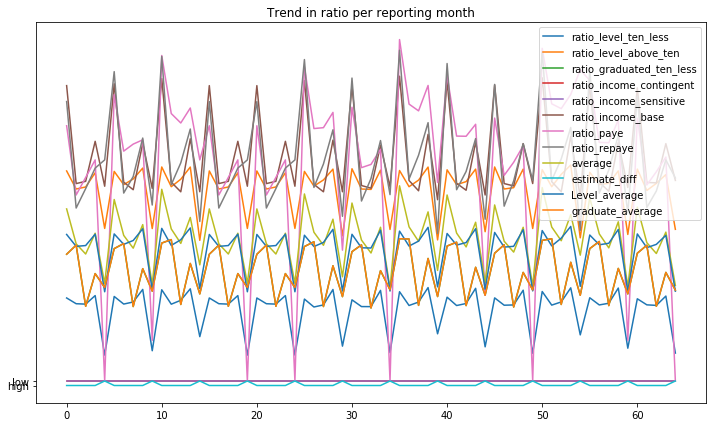

In [108]:


# get columns to plot
columns = df_ratio.columns.drop(['Servicer','month-year'])
# create x data
x_data = range(0, df_ratio.shape[0])
# create figure and axis
fig, ax = plt.subplots(figsize=(12,7))
# plot each column
for column in columns:
    ax.plot(x_data, df_ratio[column], label=column)
# set title and legend
ax.set_title('Trend in ratio per reporting month')
ax.legend()

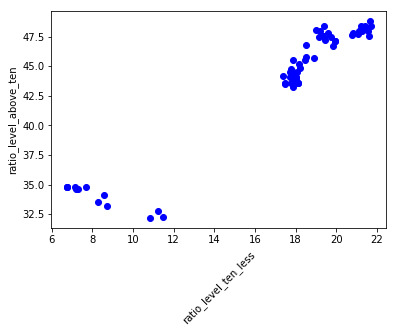

In [109]:
# Given a dataframe and two columns, scatter and label them
# This time with an optional parameter for color: If you give a 3rd parameter, it will be used as a color
# If you don't give it a 3rd parameter, it will default to 'black'
def scatter(dataframe, xcol, ycol, clr='black'):
  plt.scatter(dataframe[xcol], dataframe[ycol], color=clr)
  plt.xlabel(xcol,rotation=45)
  plt.ylabel(ycol)
  plt.show()

scatter(df_ratio, 'ratio_level_ten_less', 'ratio_level_above_ten', 'blue')

In [ ]:
df_sum = df.groupby('BillMonth').sum().drop('CustomerID', axis = 1)
df_sum = df_sum.rename(columns={'UnitPrice' : 'GrossProfit'})

plt.figure(figsize=(16,7))
sns.lineplot(x = df_sum.index, y = df_sum['GrossProfit'])
plt.show()

In [81]:
Chart(budget_top_10).mark_bar().encode(x='Servicer', y='ratio_level_above_ten')
# Chart(budget_top_10).mark_bar().encode(x='detail', y='amount')

alt.Chart(...)

In [91]:
dd=df_ratio.iloc[0:65,[0,1,2]]

dd.head()

,Servicer,month-year,ratio_level_ten_less
0,AES/PHEAA,Dec-16,19.400631
1,Great Lakes,Dec-16,18.125000
2,Nelnet,Dec-16,18.037037
3,Navient,Dec-16,19.929329
4,Not-for-Profit Servicers,Dec-16,6.739130
